# Import Pack

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
# from node import node
from copy import deepcopy
from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test
from scipy.cluster import hierarchy
from scipy import stats

/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/xinzhuo/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


# Read Data

In [2]:
# Pan Can
S_Dc = pd.read_csv("../TCI/EM/Input/TCGA expression.csv", index_col=0, header=0)

S_D = pd.read_csv('../TCI/TCGA_info/Input/PanCancer13tts.DEGmatrix.4TCI.csv', index_col=0, header=0)

S_A = pd.read_csv('../TCI/TCGA_info/Input/PanCancer13tts.SGAmatrix.4TCI.csv', index_col=0, header=0)

A_Do = pd.read_csv("../TCI/EM/A_Do.csv", index_col=0, header=0)

In [ ]:
fd = ['PTEN','PIK3CA','RB1','CCNE1','TP53','ATM','KRAS','NF1',
                    'SMARCA4','CREBBP','ARID1A','FBXW7','PIK3R1','FAT1','APC'
                    ,'MTOR','SETD2','EGFR','VHL','CDK4','NOTCH1','BRAF','E2F3']
print(np.mean(np.mean(S_Ad["TP53"])))
print(np.mean(np.mean(S_A["TP53"])))

In [ ]:
# LUAD
S_Ai = pd.read_csv("chunhui/Input/LUAD/SGAmatrix.LUAD.csv", header=0, index_col=0)
S_Ai.index = [ele[0:12] for ele in S_Ai.index if len(ele)>12]

S_Di = pd.read_csv("chunhui/Input/LUAD/DEGmatrix.LUAD.csv", header=0, index_col=0)
S_Di.index = [ele[0:12] for ele in S_Di.index if len(ele)>12]
S_Dai = S_D.loc[S_Di.index & S_D.index, A_D.columns & S_D.columns]
S_Pi = pd.read_csv("chunhui/Input/LUAD/PROmatrix.LUAD.csv", header=0, index_col=0)

S_Dci = S_Dc.loc[S_Di.index & S_Dc.index, S_Di.columns & S_Dc.columns]
S_Dcai = S_Dc.loc[S_Di.index & S_Dc.index, A_D.columns & S_Dc.columns ]
S_Pci = pd.read_csv("chunhui/Input/LUAD/PROmatrix_ct.LUAD.csv",header=0, index_col=0)
S_Pci.index = [ele[0:12] for ele in S_Pci.index if len(ele)>12]

# Hierachy Cluter

In [ ]:
lis = {"S_Ai": S_Ai, "S_Dci": S_Dci, "S_Pci": S_Pci, "S_Dct": S_Dct}
lis = { "S_Dp": S_Dc.loc[b, S_Dc.columns & set(paper_l)]}

for ele in lis.keys():
    
    df = lis[ele]
    
    # df.corr() corrleationship
    g = sns.clustermap(df, center=0, cmap="vlag", row_cluster=False, figsize=(7, 7))
    
    ax0 = g.ax_heatmap
    # ax0.set_title("ClusterMap")
    ax0.set_ylabel("Sample")
    ax0.set_xlabel("Gene")
    
    plt.show()

    # dfc = df.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]
    dfc = df.iloc[:, g.dendrogram_col.reordered_ind]
    dfc.to_csv("chunhui/Output/HNSC/%s_clu.csv" % ele, header=True, index=True)
    

    fig = plt.figure(figsize=(8, 7))
    ax1 = fig.add_subplot(111) 
    h = sns.heatmap(dfc, cmap="vlag", center=0, cbar_kws = {"shrink":0.1}, yticklabels=False, xticklabels=False, ax=ax1)
    ax1.yaxis.set_label_position("right")

    ax1.set_ylabel("Sample" )
    ax1.set_xlabel("Gene")

In [ ]:
S_Aic = S_Ai.loc[S_Ai.index & S_Dci.index]
S_Dcic = S_Dci.loc[S_Aic.index]

ga = sns.clustermap(S_Aic, cmap="vlag", center=0, row_cluster=False)
gd = sns.clustermap(S_Dcic, cmap="vlag", center=0)

S_Aic = S_Aic.iloc[:, ga.dendrogram_col.reordered_ind]
S_Dcic = S_Dcic.iloc[gd.dendrogram_row.reordered_ind, gd.dendrogram_col.reordered_ind]

dfc = pd.concat([S_Dcic, S_Aic], 1)
fig = plt.figure(figsize=(10, 10))
h = sns.heatmap(dfc, cmap="vlag", center=0, cbar_kws = {"shrink":0.1})

In [ ]:
dfci = S_Aic.iloc[gd.dendrogram_row.reordered_ind,:]

fig = plt.figure(figsize=(7, 6))
ax1 = fig.add_subplot(111) 
h = sns.heatmap(dfci, cmap="vlag", center=0, cbar_kws = {"shrink":0.1}, yticklabels=False, xticklabels=False, ax=ax1)
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("Sample" )
ax1.set_xlabel("Gene")

In [ ]:
lis = {"S_Dai": S_Dai, "S_Dcai":S_Dcai}
# hierarchy
for ele in lis.keys():
    df = lis[ele]
    row_l = hierarchy.linkage(df)
    col_l = hierarchy.linkage(df.T)
    
    g = sns.clustermap(df, cmap="vlag", center=0)

## Cut Gene

In [ ]:
# PRO
a = S_Pci.iloc[:, g.dendrogram_col.reordered_ind]
dfc = a 

df_col = list(dfc.columns)

sl = [df_col[0], "ORAOV1", "EP300", df_col[-1]]
sb_l = []
for i in range(len(sl)-1):
    sb = dfc.iloc[:, df_col.index(sl[i]): df_col.index(sl[i+1])]
    if i == (len(sl)-1)-1:
        sb = dfc.iloc[:, df_col.index(sl[i]): df_col.index(sl[i+1]) + 1]
    sb_l.append(sb)
print(sb_l)

for i in range(len(sb_l)):
    sb = sb_l[i]
    print(" ".join(sb.columns))
    print("\n")
    sb.to_csv("chunhui/Output/HNSC/S_Pci_HNSC_%s.csv" % i, index=True, header=True)

In [ ]:
# DEG
dfc = pd.read_csv("chunhui/Output/HNSC/S_Dci_clu.csv", index_col=0, header=0)
df_col = list(dfc.columns)

# kfc = pd.read_csv("chunhui/Output/HNSC/S_Dcai.csv", index_col=0, header=0)
nm_l = [ele for ele in kfc.index if "-11A" in ele]
abm_l = [ele for ele in kfc.index if "-01A" in ele]
S_Dr = kfc

sl = [df_col[0], "USP31", "ITGAX", "BRDT", "CCT5", df_col[-1]]
sb_l = []
for i in range(len(sl)-1):
    sb = dfc.iloc[:, df_col.index(sl[i]): df_col.index(sl[i+1])]
    if i == (len(sl)-1)-1:
        sb = dfc.iloc[:, df_col.index(sl[i]): df_col.index(sl[i+1]) + 1]
    sb_l.append(sb)
    print(len(sb))
    
for i in range(len(sb_l)):
    
    sb = sb_l[i]
    sb.to_csv("chunhui/Output/HNSC/S_D_HNSC_%s.csv" % i, index=True, header=True)

    S_Drn = S_Dr.loc[nm_l, sb.columns & kfc.columns]
    print(S_Drn.shape)
    S_Drn.to_csv("chunhui/Output/HNSC/S_DDrn_HNSC_%s.csv" % i, index=True, header=True)
    S_Dran = S_Dr.loc[abm_l, sb.columns & kfc.columns]
    S_Dran.to_csv("chunhui/Output/HNSC/S_DDran_HNSC_%s.csv" % i, index=True, header=True)
    S_Dra = pd.concat([S_Drn, S_Dran], 0)
    S_Dra.to_csv("chunhui/Output/HNSC/S_DDra_HNSC_%s.csv" % i, index=True, header=True)

## Label Heatmap

In [ ]:
sub = pd.read_csv("EM/Input/tcga_subtype.csv", index_col=0).loc[S_A.index]

sub["index"] = sub.index
sub["subtype"] = sub["X_primary_disease"]
df = S_D

In [6]:
# HNSC paper
subtype = pd.read_csv("PORT/7.2.csv", index_col=0, header=0)
subtype.index = [ele.replace(".", "-") for ele in subtype.index]
subtype = subtype.loc[subtype.index & S_Dci.index]
S_Dp = S_Dc.loc[subtype.index & S_D.index, S_Dc.columns & set(paper_l)]

a = np.unique(subtype["RNA"])
b = []
for ele in a:
    subi = subtype[subtype["RNA"] == ele]
    b.extend(subi.index)
sub = subtype.loc[b]

df = S_Dp.loc[sub.index]
sub["subtype"] = sub["RNA"]
dfi = pd.concat([df, sub["subtype"]], 1)

FileNotFoundError: [Errno 2] No such file or directory: 'PORT/7.2.csv'

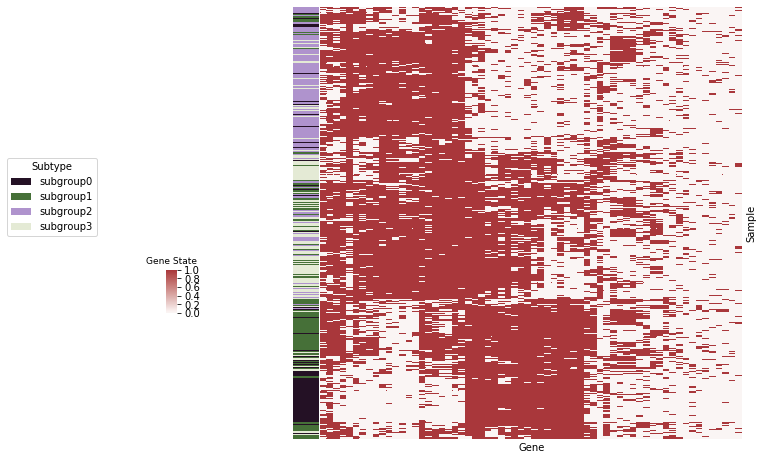

## TCGA predict pathway Label

In [ ]:
para = pd.read_table("Pre/Input/TCGA_BRCA/BRCA_merge_merged_reals.txt", sep="\t", index_col=0)
# para = pd.read_table("Pre/Input/TCGA_BRCA/BRCA_PanCan33_ssGSEA_1387GeneSets_NonZero_sample_level_Z.txt", sep="\t", index_col=0)

In [ ]:
p53 = node["P53"] + ["P53"]
p53_l = [ele for ele in para.index if any(x in ele.upper() for x in p53)]

pi3k = node["PI3K"] + ["PI3K", "SUI"]
pi3k_l = [ele for ele in para.index if any(x in ele.upper() for x in pi3k)]

rtk = node["RTK"]
rtk_l = [ele for ele in para.index if any(x in ele.upper() for x in rtk)]

In [ ]:
para_d = para.loc[pi3k_l]
para_d = para_d.loc[para_d.index[np.mean(abs(para_d), 1)>0.1]]

sns.clustermap(para_d, center=0, cmap="vlag", xticklabels=False)

## Bicluster

In [ ]:
S_P = pd.read_csv("EM/Output/S_Ao_sb1/S_P_BRCA.csv", index_col=0, header=0)
S_Ai = pd.read_csv("EM/Input/S_Asb/S_A_BRCA.csv", index_col=0, header=0)
sga = "PIK3CA"
A_Di = A_D[A_D.columns[np.sum(A_D.loc[[sga], :]) > 0]]
df = S_D.loc[S_P.index, A_Di.columns]

In [ ]:
dfs = df[df.columns[np.sum(df)>0]]
dfs = dfs.loc[dfs.index[np.sum(dfs, 1)>0]]

# bicluster
data = dfs
n = 10
model = SpectralBiclustering(n_clusters=n, random_state=0)
model.fit(data)
fit_data = data.iloc[list(np.argsort(model.row_labels_)),list(np.argsort(model.column_labels_))]

# print elements in each cluster
for i in range(n):
    sga_l = list(data.index[list(model.get_indices(i)[0])])
    # S_Ai = S_P[sga_l]
    # S_Ai.to_csv("EM/Output/BI/S_P%s" % i, index=True, header=True)
    print(list(data.index[list(model.get_indices(i)[0])]))

# This just makes some sample 2D data and a corresponding vmap dict with labels for the values in the data
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot()

sns.heatmap(fit_data, center=0, cmap="vlag", cbar_kws={"shrink": 0.1, "aspect":2}, ax=ax1)

## Z score test compare differnece 

In [ ]:
sga = "PIK3CA"
rep_l = S_P.index[S_P["PIK3CA"] == 1]
nrep_l =  S_P.index[S_P["PIK3CA"] == 0]

rep_exp = S_P.loc[rep_l]
nrep_exp = S_P.loc[nrep_l]

stats_l = []
de_l = []
for deg in rep_exp.columns:
    rsv1 = rep_exp[deg]
    rsv2 = nrep_exp[deg]
    p = stats.ttest_ind(rsv1,rsv2)
    stats_l.append(p)
    if p[1]<0.01:
        de_l.append(deg)

df = pd.concat([rep_exp[de_l], nrep_exp[de_l]], 0)
sns.clustermap(df, row_cluster=False, center=0, cmap="vlag",)

## t-sne

In [ ]:
A_Dc = A_D[A_D.columns[np.sum(A_D.loc[["PIK3CA"],:])>0]]
# sns.clustermap(S_Dc.loc[S_Ai.index, S_Dc.columns & A_Dc.columns])
S_Ai = pd.read_csv("EM/Output/S_Ao_sb1/S_P_BRCA.csv", index_col=0, header=0)

from sklearn.manifold import TSNE
X = S_D.loc[S_Ai.index, S_D.columns & A_Dc.columns]
X_embedded = TSNE(n_components=2).fit_transform(X)
sns.scatterplot(data=X_embedded)